# Module detection and segmentation

This is a quick tutorial showcasing the detection of solar module in EL images as well as segmentation into cells.

## Preparation

Enable auto completion 

In [1]:
%config IPCompleter.greedy=True

Now, we need to import two packages. The `data` packges offers demo datasets as well as routines for reading and writing images. The `preproc.detection`-package implements detection and segmentation methods.

In [2]:
from pvinspect import data
from pvinspect.preproc import detection

## Detection

Let's now read two images from the demo sequences `scmos` and run the detection. You may instead use `.ingas()` for a different sequence or adapt the number of images to your needs.

In [3]:
imgs = data.datasets.poly10x6(5)
imgs = detection.locate_module_and_cells(imgs)

100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


We can use the `.head()` method on any image sequence to show the first N images (4 by default). You may use an optional argument to show more/less, e.g. `.head(6)`.

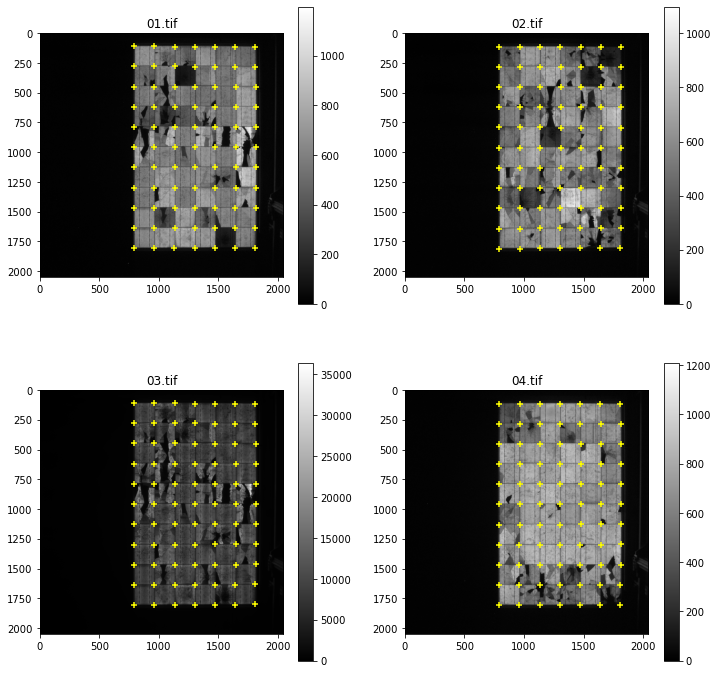

In [4]:
imgs.head()

## Segmentation

Now, lets compute a sequence of cell images and show the result:

100%|██████████| 5/5 [00:11<00:00,  2.36s/it]


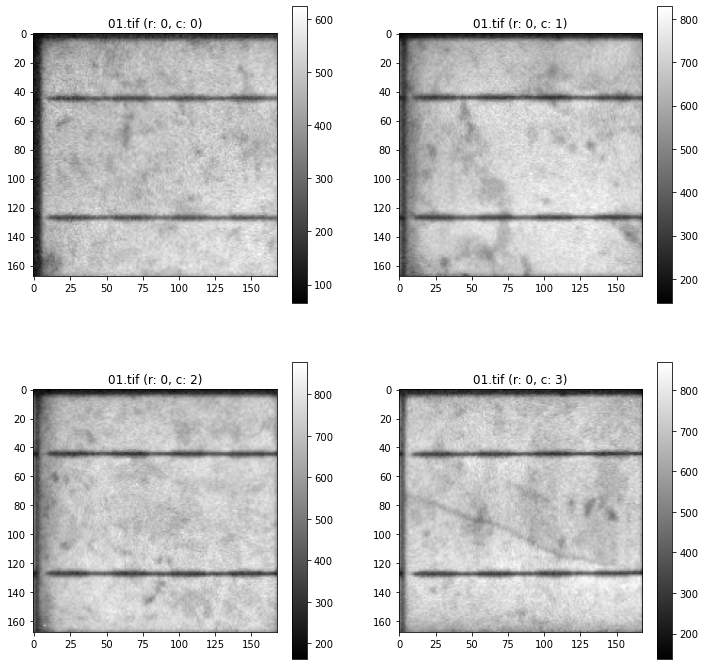

In [5]:
cells = detection.segment_cells(imgs)
cells.head()

Our demo modules have 60 cells each. Hence, we obtain 300 cell images:

In [6]:
len(cells)

300

Finally, save the resulting cell images to a directory `results`:

In [7]:
data.io.save_images('results', cells)

100%|██████████| 300/300 [00:00<00:00, 434.16it/s]


## Visualization

We can easily visualize the dependency between cell image and original module image. This is possible since the original module image is referenced by the meta property `segment_module_original`:

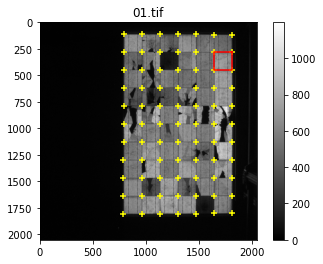

In [10]:
cells[1].get_meta("segment_module_original").show()

As usual, we can partially disable visualizations. For example:

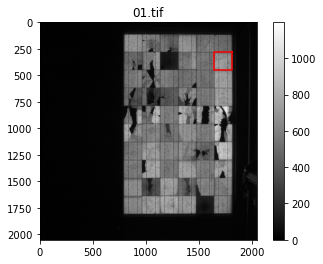

In [11]:
cells[1].get_meta("segment_module_original").show(show_cell_crossings=False)